### DecisionTree for WSN nodes Anomaly detection

In [40]:
# importing the required modules
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
# Importing the dataset using pandas module
dataset = pd.read_csv('temperature-huminity-nodes.csv')
dataset.head(10)

,Node,Temperature,Humidity,Packets,FT,FH,FP,Label
0,1,22,66,5,0,0,0,0
1,2,35,67,7,1,0,0,1
2,3,28,67,6,0,0,0,0
3,4,23,58,5,0,1,0,2
4,5,20,66,6,0,0,0,0
5,6,24,65,5,0,0,0,0
6,7,22,65,7,0,0,0,0
7,8,23,66,7,0,0,0,0
8,9,29,65,9,0,0,1,3
9,10,23,68,8,0,0,0,0


### Dataset description....7 types of Fault
1. Label is set to 0 for No Fault
2. Label is set to 1 for Fault in Temperature
3. Label is set to 2 for Fault in Humidity
3. Label is set to 3 for Fault in Packets
4. Label is set to 4 for Fault in Temperature and Humidity
5. Label is set to 5 for Fault in Temperature and Packets
6. Label is set for 6 for Fault in Humidity and Packets
7. Label is set for 7 for Fault in all Temperayire, Humidity and Packets

In [42]:
# splitting the dataset into input and output datasets
X = dataset.iloc[:, [1,2,3]].values
y = dataset.iloc[:, 7].values

In [43]:
# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 25%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)

In [44]:
# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

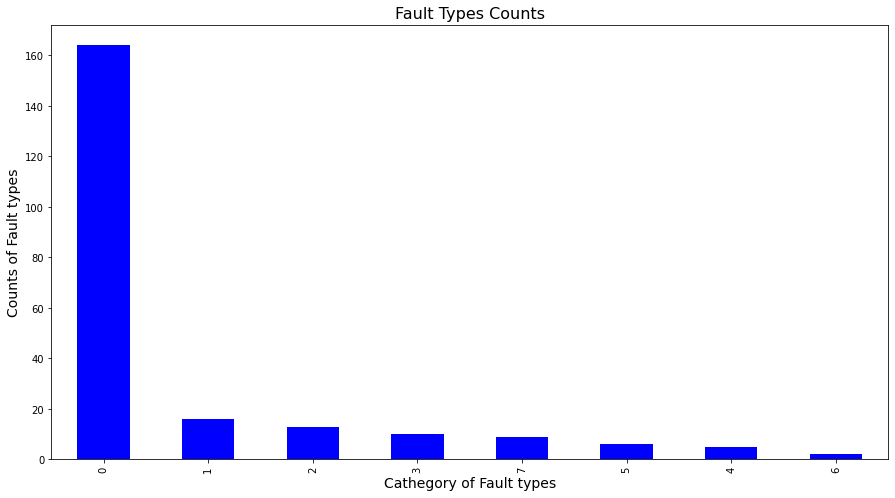

In [45]:
# To draw bar graph of Fault types...
y_bar=pd.DataFrame(y_train)
fig = plt.figure(figsize = (15, 8))
y_bar[0].value_counts().plot(kind='bar', color='blue');
plt.xlabel("Cathegory of Fault types",fontsize=14)
plt.ylabel("Counts of Fault types", fontsize=14)
plt.title("Fault Types Counts", fontsize=16)
plt.show()

#### 7 types of Fault
No Fault.....NF--> 0
Fault Temperature....FT--> 1
Fault Humidity...FH --> 2
Fault Packet....FP--> 3
Fault Temperature and Humidity .... FTH --> 4
Fault Temperature Temperature and Packet....TP--> 5
Fault Humidity and packet .....FHP-- > 6
Fault in all...FTHP-- >7

In [50]:
# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
classifer=DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)
y_pred= classifer.predict(X_test)

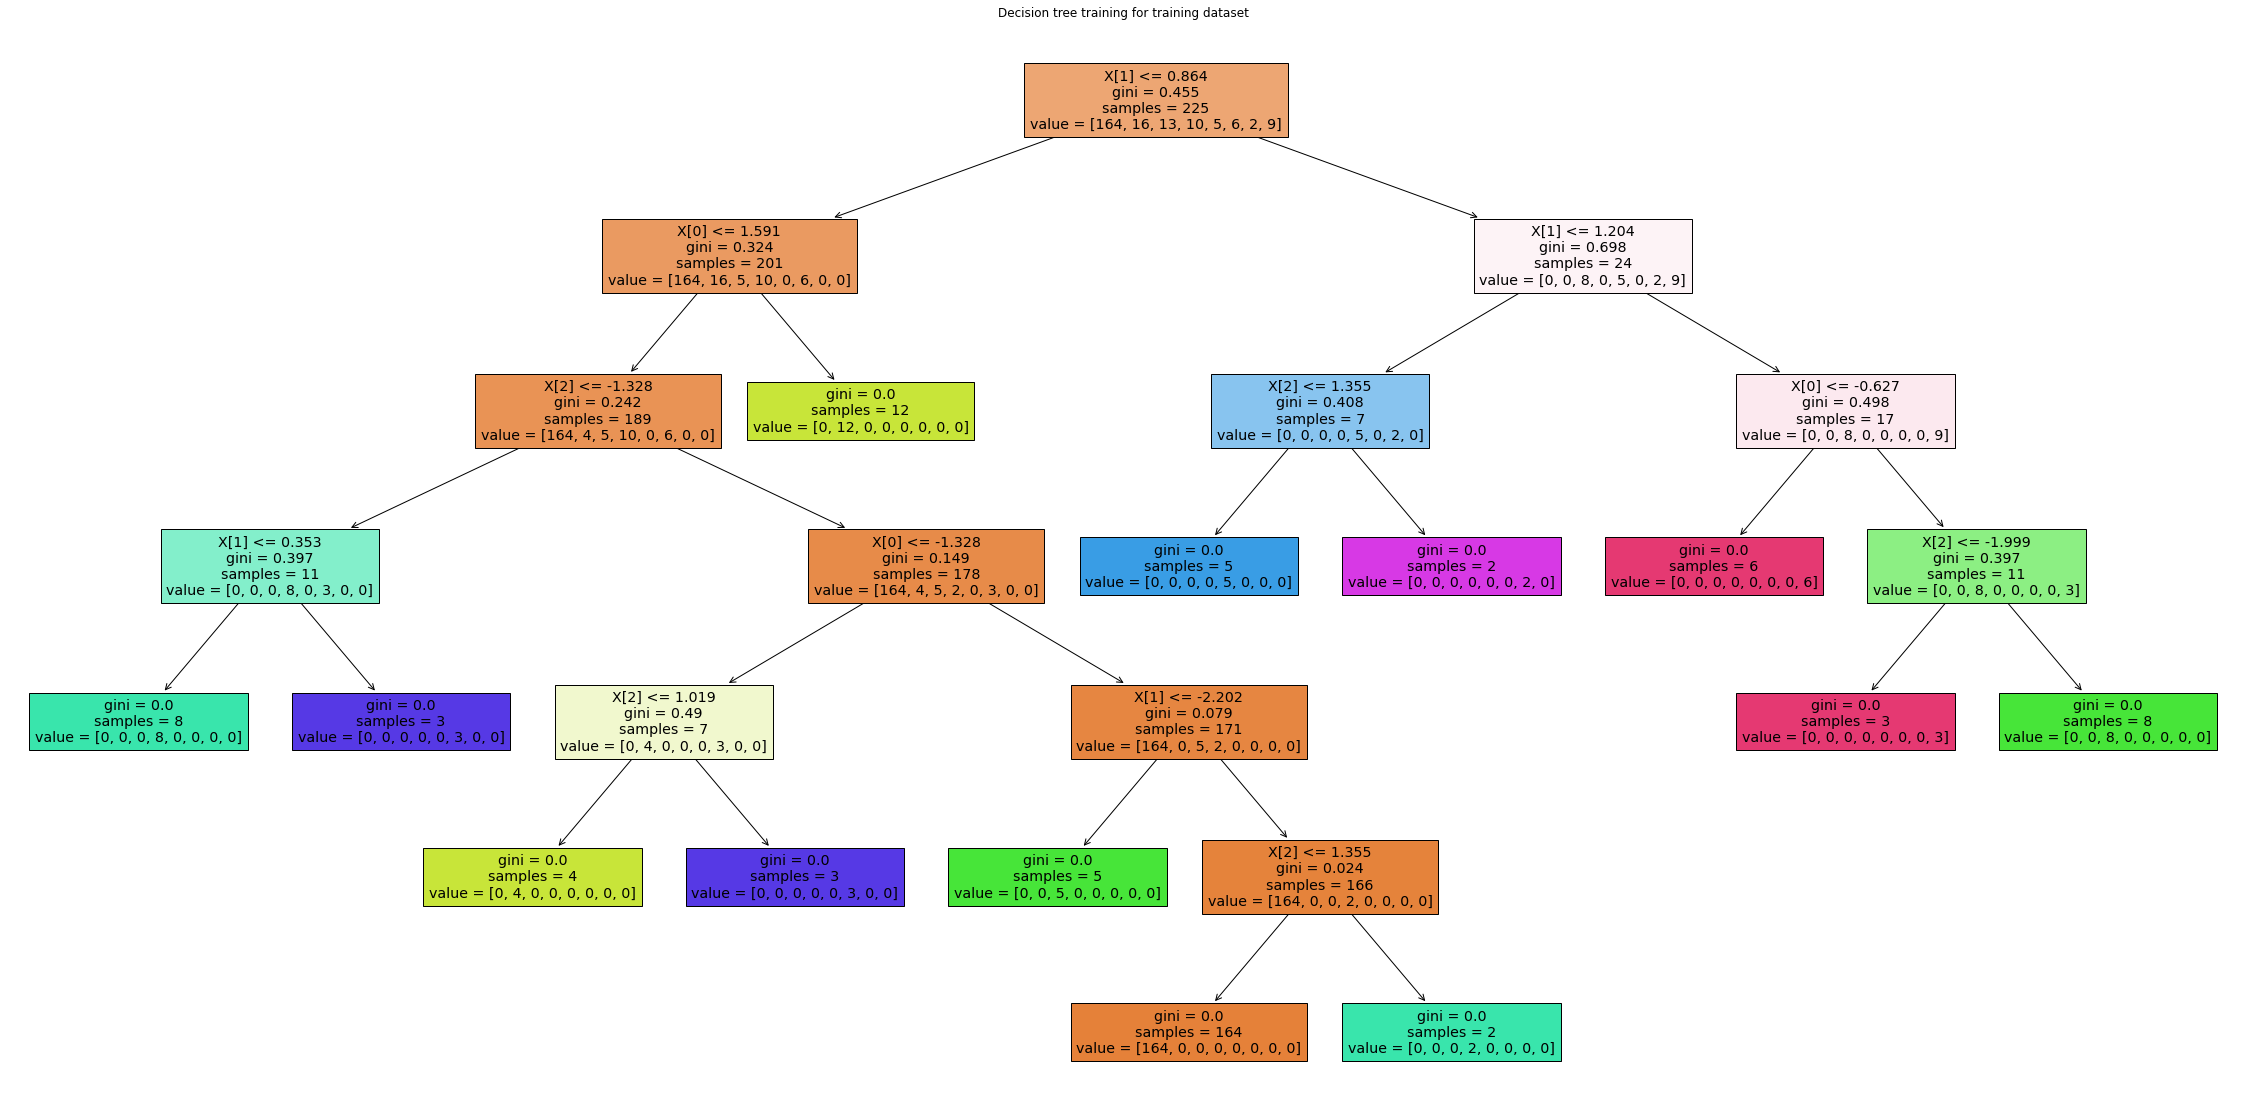

In [46]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

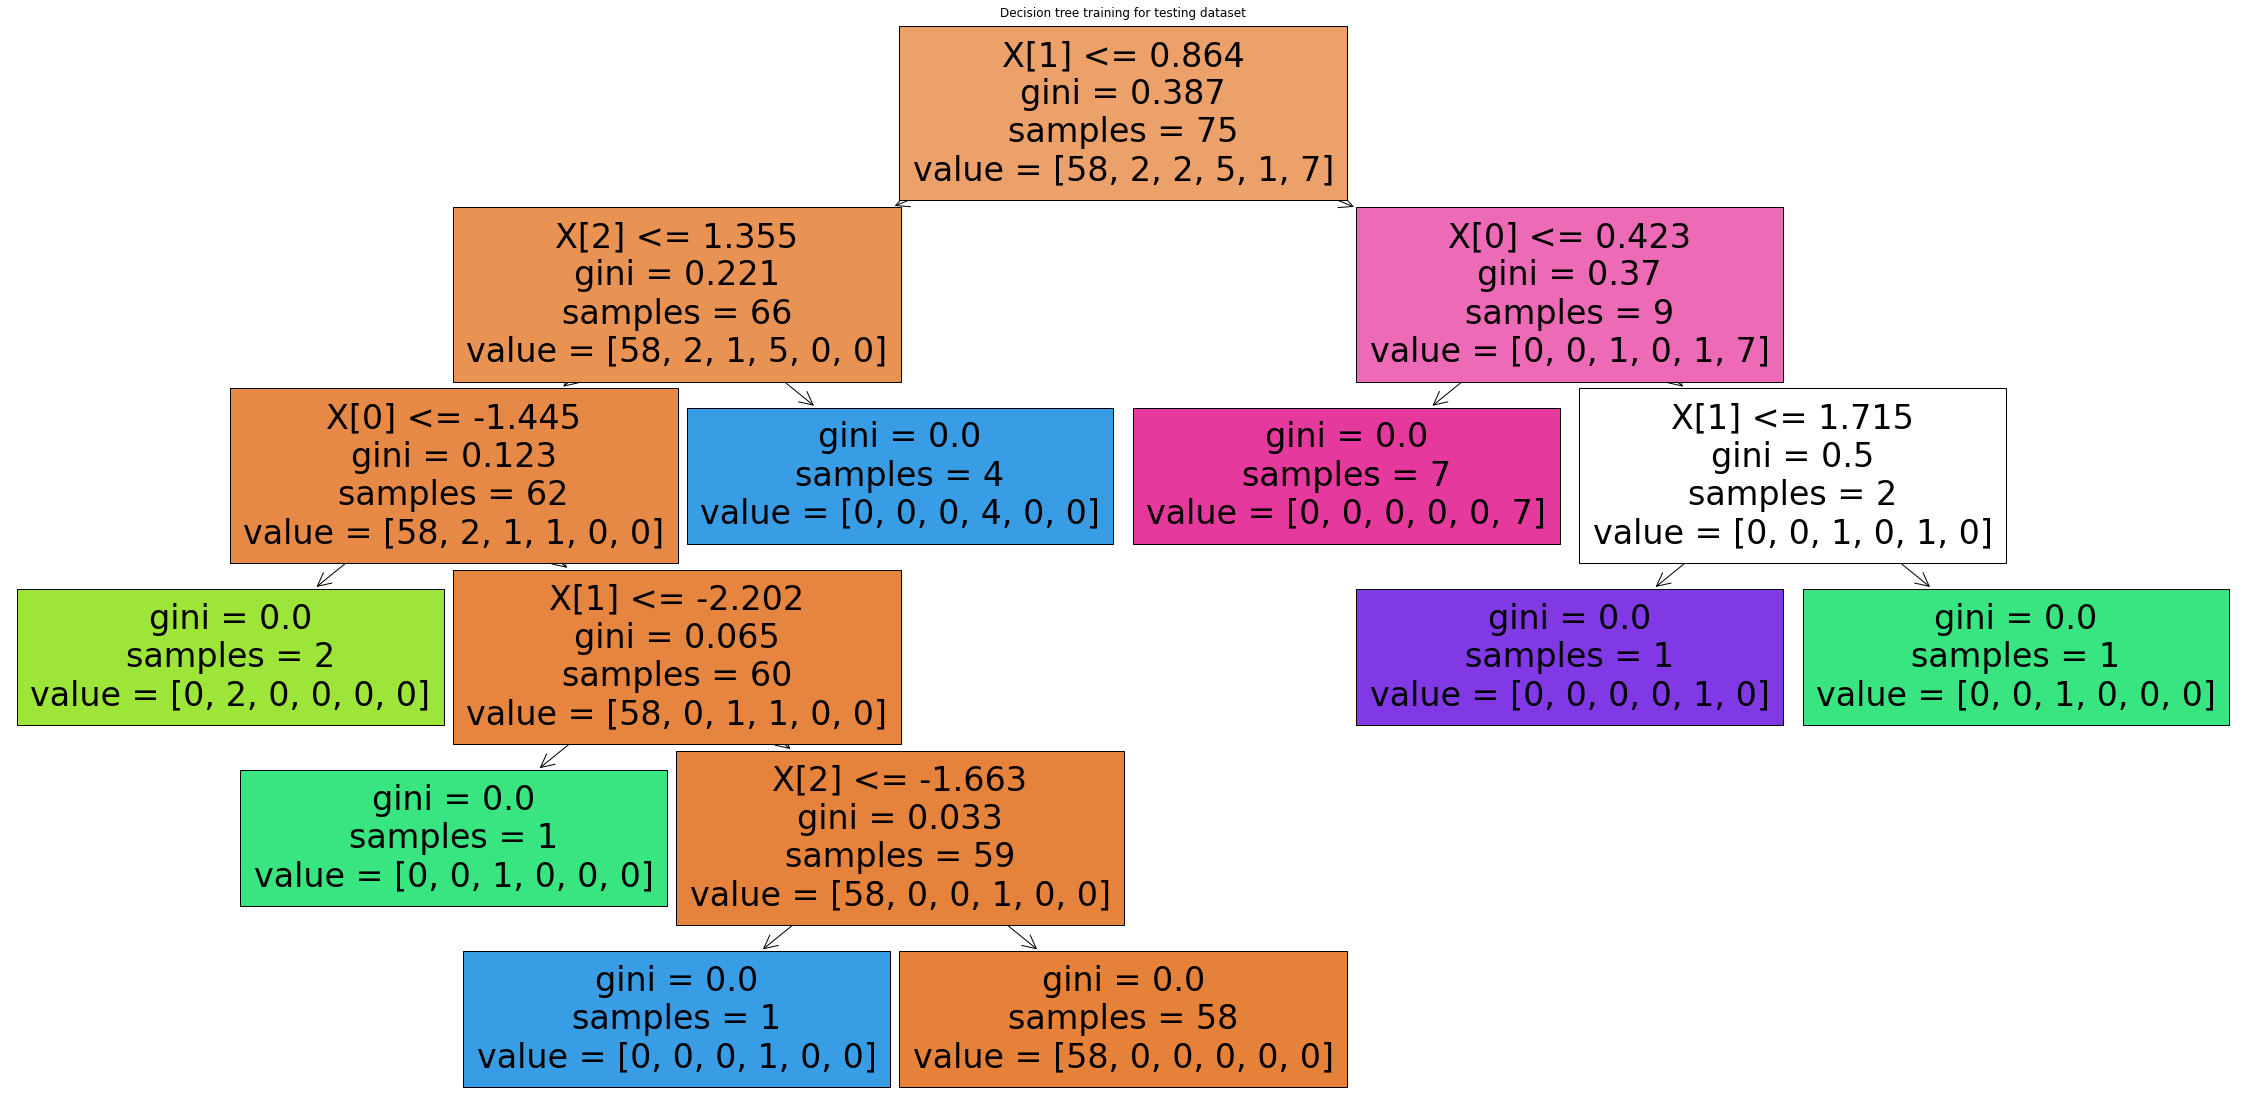

In [47]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

In [48]:
# importing the tree
from sklearn import tree

# text based tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.86
|   |--- feature_2 <= 1.35
|   |   |--- feature_0 <= -1.44
|   |   |   |--- class: 1
|   |   |--- feature_0 >  -1.44
|   |   |   |--- feature_1 <= -2.20
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  -2.20
|   |   |   |   |--- feature_2 <= -1.66
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_2 >  -1.66
|   |   |   |   |   |--- class: 0
|   |--- feature_2 >  1.35
|   |   |--- class: 3
|--- feature_1 >  0.86
|   |--- feature_0 <= 0.42
|   |   |--- class: 6
|   |--- feature_0 >  0.42
|   |   |--- feature_1 <= 1.72
|   |   |   |--- class: 4
|   |   |--- feature_1 >  1.72
|   |   |   |--- class: 2



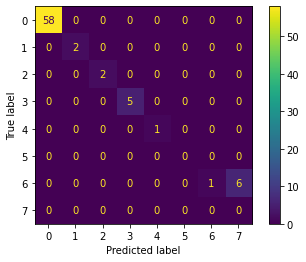

In [51]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_pred, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
#plt.figure(figsize = (15, 8))
disp.plot()

# showing the matrix
plt.show()

In [52]:
# importing the module
from sklearn.metrics import hamming_loss

print(f'Hamming Loss: {hamming_loss(y_test, y_pred):.3f}')

Hamming Loss: 0.080
